<a href="https://colab.research.google.com/github/luguzman/estadistica-inferencial/blob/master/Contrastes_de_Hip%C3%B3tesis_%20param%C3%A9tricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

#Test de una muestra

In [ ]:
np.random.seed(2020)

populations_ages1 = stats.poisson.rvs(loc=18, mu = 35, size = 1500000)
populations_ages2 = stats.poisson.rvs(loc=18, mu = 10, size = 1000000)
population_ages = np.concatenate((populations_ages1, populations_ages2))

In [ ]:
mallorca_ages1 = stats.poisson.rvs(loc=18, mu=30, size = 30)
mallorca_ages2 = stats.poisson.rvs(loc=18, mu=10, size = 20)
mallorca_ages = np.concatenate((mallorca_ages1, mallorca_ages2))

In [ ]:
print(population_ages.mean())
print(mallorca_ages.mean())

42.9991224
39.46


$$
\left.
\begin{array}{ll}
H_0: & \mu  = 43\\
H_1: & \mu \neq 43
\end{array}
\right\}
$$
donde $\mu$ representa la media de edad de la isla de Mallorca.

In [ ]:
stats.ttest_1samp(a = mallorca_ages, popmean=population_ages.mean())

Ttest_1sampResult(statistic=-2.1714050303885575, pvalue=0.034771114438177056)

In [ ]:
alpha = 0.05
(stats.t.ppf(q = alpha/2, df = len(mallorca_ages)-1), stats.t.ppf(q=1-alpha/2, df = len(mallorca_ages)-1))

(-2.0095752344892093, 2.009575234489209)

In [ ]:
stats.t.cdf(x = -2.1714050303885575, df = len(mallorca_ages)-1)

0.017385557219088528

In [ ]:
sigma = mallorca_ages.std()/math.sqrt(len(mallorca_ages))
print(sigma)

1.6134955841278276


In [ ]:
stats.t.interval(1-alpha, df = len(mallorca_ages)-1, loc = mallorca_ages.mean(), scale = sigma)

(36.21755923317902, 42.702440766820985)

# Test de dos poblaciones independientes


In [ ]:
np.random.seed(42)
menorca_ages1 = stats.poisson.rvs(loc = 18, mu = 33, size = 30)
menorca_ages2 = stats.poisson.rvs(loc = 18, mu = 13, size = 20)
menorca_ages = np.concatenate((menorca_ages1, menorca_ages2))
print(menorca_ages.mean())

42.44


$$
\left.
\begin{array}{ll}
H_0: & \mu_1  = \mu_2\\
H_1: & \mu_1 \neq \mu_2
\end{array}
\right\}
$$
donde $\mu_1$ representa la media de edad de la isla de Mallorca y $\mu_2$ representa la edad media de la isla de Menorca.

In [ ]:
stats.ttest_ind(a = mallorca_ages, b = menorca_ages, equal_var=False)

Ttest_indResult(statistic=-1.3604819759494602, pvalue=0.17683431726007182)

# Test de dos poblaciones emparejadas

In [ ]:
np.random.seed(100)

before = stats.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + stats.norm.rvs(scale = 5, loc = -1.25, size = 100)

issue_df = pd.DataFrame({
    "data_before":before,
    "data_after":after,
    "data_change":after-before
})

issue_df.describe()

,data_before,data_after,data_change
count,100.000000,100.000000,100.000000
mean,246.875024,245.273794,-1.601231
std,29.239138,28.860282,5.347108
min,175.385454,182.016288,-16.116577
25%,224.578491,224.637324,-4.794257
50%,248.904910,246.617406,-1.980166
75%,270.287894,266.937200,2.271459
max,311.038227,310.899838,10.243270


$$
\left.
\begin{array}{ll}
H_0: & \mu_1  = \mu_2\\
H_1: & \mu_1 \neq \mu_2
\end{array}
\right\}
$$
donde $\mu_1$ representa la media de la condición estudiada antes del tratamiento y $\mu_2$ representa la meddia de la condición estudiada después del tratamiento

In [ ]:
stats.ttest_rel(a=before, b=after)

Ttest_relResult(statistic=2.9945735001280593, pvalue=0.003471639955998896)

# Errores de tipo I y de tipo II
- Error tipo 1: $\alpha$, probabilidad de rechazar $H_0$ cuando esta es verdadera
- Error tipo 2: probabilidad de aceptar $H_0$ cuando esta es falsa

[]

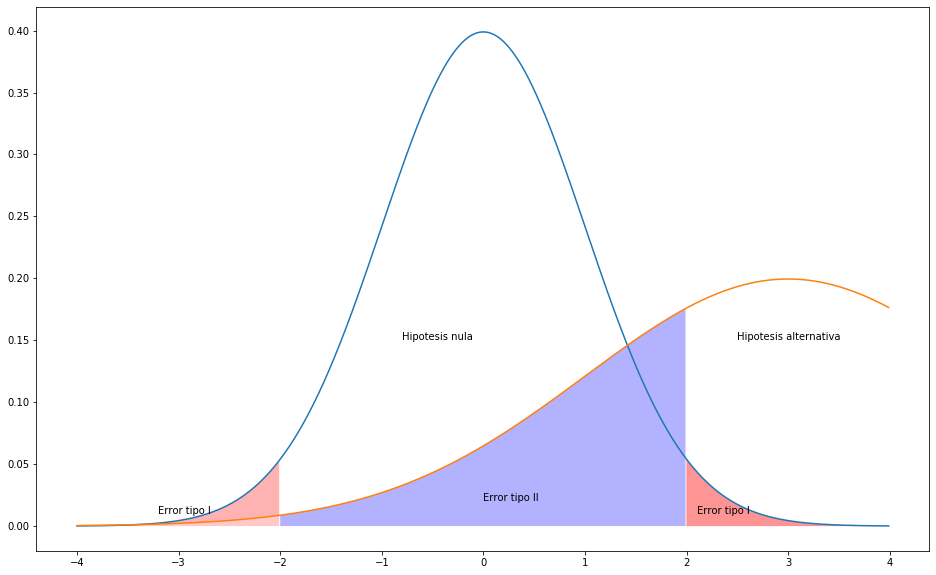

In [ ]:
plt.figure(figsize=(16,10))


plt.fill_between(x=np.arange(-4, -2, 0.01), y1 = stats.norm.pdf(np.arange(-4,-2,0.01)), facecolor="red", alpha = 0.3)
plt.fill_between(x=np.arange(-2, 2, 0.01), y1 = stats.norm.pdf(np.arange(-2,2,0.01)), facecolor="white", alpha = 0.3)
plt.fill_between(x=np.arange(2, 4, 0.01), y1 = stats.norm.pdf(np.arange(2,4,0.01)), facecolor="red", alpha = 0.6)


plt.fill_between(x=np.arange(-4, -2, 0.01), y1 = stats.norm.pdf(np.arange(-4,-2,0.01), loc = 3, scale=2), facecolor="white", alpha = 0.3)
plt.fill_between(x=np.arange(-2, 2, 0.01), y1 = stats.norm.pdf(np.arange(-2,2,0.01), loc = 3, scale=2), facecolor="blue", alpha = 0.3)
plt.fill_between(x=np.arange(2, 4, 0.01), y1 = stats.norm.pdf(np.arange(2,4,0.01), loc = 3, scale=2), facecolor="white", alpha = 0.3)

plt.plot(np.arange(-4,4,0.01), stats.norm.pdf(np.arange(-4,4,0.01)))
plt.plot(np.arange(-4,4,0.01), stats.norm.pdf(np.arange(-4,4,0.01), loc=3, scale=2))

plt.text(x=-0.8, y=0.15, s="Hipotesis nula")
plt.text(x=2.5, y=0.15, s="Hipotesis alternativa")
plt.text(x=2.1, y=0.01, s="Error tipo I")
plt.text(x=-3.2, y=0.01, s="Error tipo I")
plt.text(x=0, y=0.02, s="Error tipo II")

plt.plot()

In [ ]:
alpha = 0.05

lower_quantile = stats.norm.ppf(alpha/2)
upper_quantile = stats.norm.ppf(1-alpha/2)

low = stats.norm.cdf(lower_quantile, loc = 3, scale = 2)
upper = stats.norm.cdf(upper_quantile, loc = 3, scale = 2)

upper-low

0.294956061112323